In [81]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [83]:
import os
for dirname, _, filenames in os.walk('./Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df_train = pd.read_csv('./Data/california_housing_train.csv')
df_test = pd.read_csv('./Data/california_housing_test.csv')

./Data/california_housing_test.csv
./Data/california_housing_train.csv


In [84]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [85]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [86]:
df_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [87]:
df_train.isnull().sum(axis=0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [88]:
df_train.housing_median_age.mean()

28.58935294117647

<AxesSubplot:>

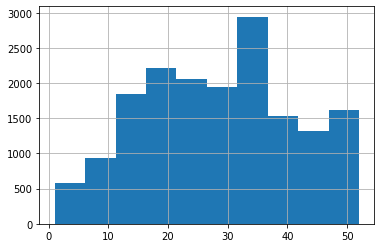

In [89]:
df_train.housing_median_age.hist()

In [90]:
df_train.housing_median_age.count()

17000

In [91]:
df_train.count()

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

In [92]:
df_train.total_rooms.value_counts()

1582.0     16
1527.0     15
1717.0     14
1703.0     14
1471.0     14
           ..
5896.0      1
11275.0     1
10626.0     1
151.0       1
2694.0      1
Name: total_rooms, Length: 5533, dtype: int64

In [93]:
df_train.total_rooms.head()

0    5612.0
1    7650.0
2     720.0
3    1501.0
4    1454.0
Name: total_rooms, dtype: float64

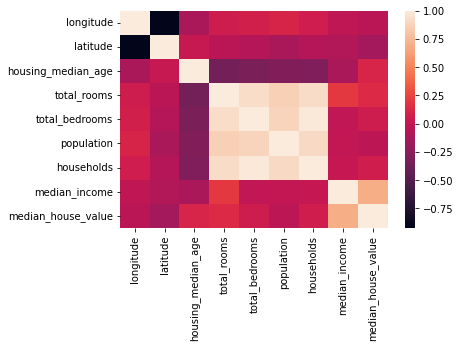

In [94]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix);

In [95]:
df_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [96]:
df_train_target = df_train['median_house_value']

In [97]:
df_train.drop('median_house_value', inplace=True, axis=1)
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


In [98]:
df_train_target.shape

(17000,)

In [99]:
df_train_target.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

<AxesSubplot:>

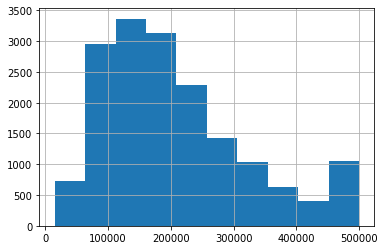

In [100]:
df_train_target.hist()

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
reg = LinearRegression().fit(df_train, df_train_target)
reg.score(df_train, df_train_target)

0.6413378529502689

In [103]:
df_test_target = df_test['median_house_value']
df_test.drop('median_house_value', inplace=True, axis=1)

In [104]:
reg.score(df_test, df_test_target)

0.6195057678311935

In [105]:
df_train_pred = reg.predict(df_train)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

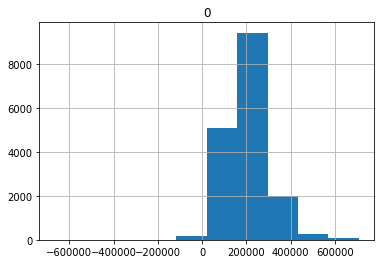

In [106]:
pd.DataFrame(df_train_pred).hist()

In [107]:
print(df_train.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object


In [108]:
print(df_train_target.dtypes)

float64


In [109]:
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [111]:
df_train_f = df_train.apply(pd.to_numeric, downcast='float')
df_train_target_f = pd.to_numeric(df_train_target, downcast='float')

print(df_train_f.dtypes)
print(df_train_target_f.dtypes)

longitude             float32
latitude              float32
housing_median_age    float32
total_rooms           float32
total_bedrooms        float32
population            float32
households            float32
median_income         float32
dtype: object
float32


In [112]:
print(df_test.dtypes)
print(df_test_target.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object
float64


In [113]:
df_test_f = df_test.apply(pd.to_numeric, downcast='float')
df_test_target_f = pd.to_numeric(df_test_target, downcast='float')

In [114]:
df_train_target_f.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float32

In [115]:
print(np.where(df_train.dtypes != float)[0])

[]


In [116]:
categorical_features_indices = np.where(df_train.dtypes != float)[0]

In [117]:
df_train_target.shape

(17000,)

In [118]:
Y = pd.DataFrame(np.random.randint(0,100,size=(17000, 1)))

In [119]:
X = pd.DataFrame(np.random.randint(0,100,size=(17000, 10)))

In [120]:
X_short = df_train.head(10)
Y_short = df_train_target.head(10)

X_t_short = df_test.head(1)
Y_t_short = df_test_target.head(1)

In [121]:
Y_t_short.head()

0    344700.0
Name: median_house_value, dtype: float64

In [122]:
X_t_short.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085


In [197]:
model1 = CatBoostRegressor(
    logging_level='Verbose',
    loss_function='RMSE',
    iterations=10000,
    learning_rate=0.01,
    l2_leaf_reg=3,
    random_seed=42,
)

In [198]:
pool1 = Pool(df_train, df_train_target, cat_features=categorical_features_indices, feature_names=list(df_train.columns))
model1.fit(
    df_train, df_train_target,
    cat_features=categorical_features_indices,
    eval_set=(df_test, df_test_target),
    logging_level='Silent',
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [199]:
model1.predict(df_test)

array([436850.8399113 , 202481.62330555, 276247.64077835, ...,
        76574.32741163, 195699.7166105 , 529293.01619735])

In [200]:
model1.score(df_test, df_test_target)

0.8336873827011524

In [201]:
model1.score(df_train, df_train_target)

0.9229835212474957

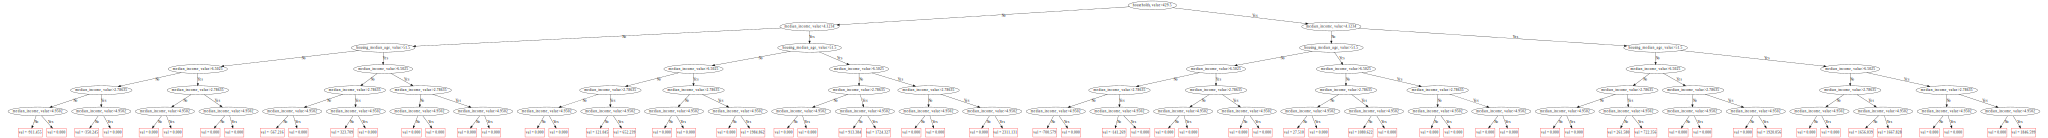

In [202]:
model1.plot_tree(tree_idx=0, pool=pool1)

In [203]:
tree_count = model1.tree_count_
print(tree_count)

9989


In [204]:
importances = model1.feature_importances_
print('Feature importances:', np.array(importances))
print('Feature names:', np.array(pool1.get_feature_names()))

Feature importances: [23.82305034 24.43223075  6.5348236   2.88213226  4.40400336  6.8176621
  3.72395443 27.38214316]
Feature names: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']


In [207]:
df_train[['longitude', 'latitude']].head()

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57


In [214]:
df_train['longitude'].unique().size

827

In [215]:
df_train['latitude'].unique().size

840

In [217]:
df_train.shape

(17000, 8)

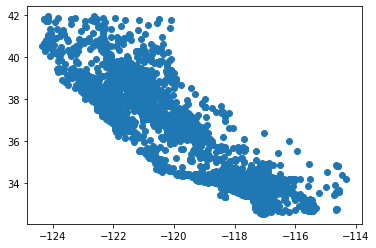

In [218]:
import matplotlib.pyplot as plt
plt.scatter(df_train['longitude'], df_train['latitude'])
plt.show()

In [220]:
model2 = CatBoostRegressor(
    logging_level='Verbose',
    loss_function='RMSE',
    iterations=10000,
    learning_rate=0.01,
    l2_leaf_reg=3,
    random_seed=42,
    ignored_features=['longitude', 'latitude']
)
model2.fit(
    df_train, df_train_target,
    cat_features=categorical_features_indices,
    eval_set=(df_test, df_test_target),
    logging_level='Silent',
    plot=True
);

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [221]:
model2.score(df_test, df_test_target)

0.6695869284477278